In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import math
import cv2
# Nhúng hình ảnh, đồ thị trong notebook
%matplotlib inline

In [2]:
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, regularizers
from keras.layers.noise import GaussianNoise
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.np_utils import to_categorical
K.set_image_dim_ordering('th')
#print(K.image_data_format())

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
## Sử dụng GPU
import tensorflow as tf
from keras.backend import tensorflow_backend
config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
session = tf.Session(config=config)
tensorflow_backend.set_session(session)

In [4]:
from keras.datasets import mnist

# Đọc dữ liệu (Số viết tay)

In [55]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [143]:
(DataImageTrain, DataLblTrain), (DataImageTest, DataLblTest) = mnist.load_data()

In [56]:
print("X_train:",X_train.shape, " X_test:",X_test.shape)

X_train: (60000, 28, 28)  X_test: (10000, 28, 28)


Kích thước ảnh 28*28

In [57]:
image_size=28
# Số từ 0-9
num_classes = 10
input_shape = (1,image_size, image_size)

In [58]:
def HienThiAnhSo(TapDuLieu,Lbl,NumImage,Hang,Cot, figsize=(20,10)):
    figs = plt.figure(figsize=figsize)
    i=1
    for NumI in range(NumImage):
        img = TapDuLieu[NumI]
        plt.subplot(Hang, Cot, i)  # A grid of 8 rows x 8 columns
        #print(i)
        plt.axis('off')
        plt.title(str(Lbl[NumI]), fontsize=8)
        i += 1
        _ = plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.show()

In [93]:
def ThongTinLabels(LabelsTrain):
    lbl = []
    NameImagePre=""
    for ten in range(len(LabelsTrain)):
        if NameImagePre != LabelsTrain[ten]:
            NameImagePre = LabelsTrain[ten]
            lbl.append(NameImagePre)
    return np.asarray(lbl)

In [94]:
lbl_Train = ThongTinLabels(y_train)

In [96]:
len(lbl_Train)

54150

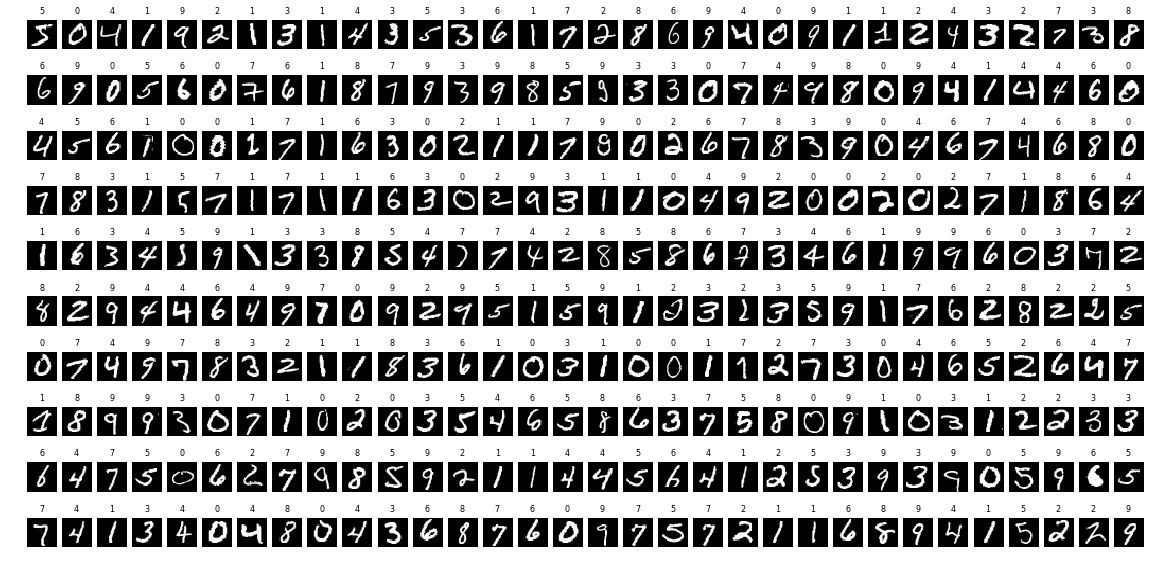

In [59]:
HienThiAnhSo(X_train,y_train,320,10,32)

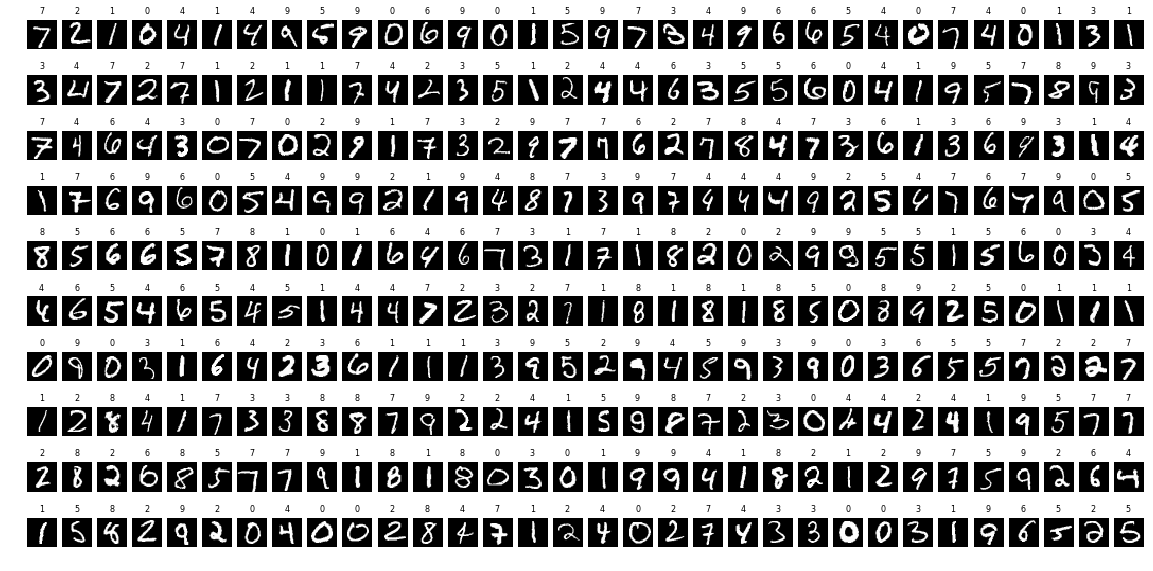

In [60]:
HienThiAnhSo(X_test,y_test,320,10,32)

In [61]:
X_train = X_train.reshape(X_train.shape[0], 1, image_size, image_size)
X_test = X_test.reshape(X_test.shape[0], 1, image_size, image_size)
X_train.shape

(60000, 1, 28, 28)

In [62]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [63]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [65]:
# One hot encode
from keras import utils as np_utils
y_train_lbl = np_utils.to_categorical(y_train,num_classes)
y_test_lbl = np_utils.to_categorical(y_test,num_classes)
#num_classes = y_test.shape[1]

# a. Khai báo biến đầu vào cho mạng CNN 

In [75]:
# batch_size: Do bộ nhớ của máy tính / card đồ họa có giới hạn nên chúng ta không thể học tất cả dữ liệu một lúc. 
# Mà chúng ta sẽ sử dụng từng bộ dữ liệu nhỏ để tính theo nhiều lần. Số lượng dữ liệu một lần tính gọi là batch_size
batch_size = 128
# epochs là số lần học
epoch = 10
# Kích thước hàm filter
filter_pixel=3
# Dropout là một kĩ thuật Regularization để chống lại vấn đề overfitting
# https://labs.septeni-technology.jp/technote/ml-17-neural-net-regularization-with-drop-out/
droprate=0.25

# b. Khai báo mạng CNN 

In [76]:
def DoThiTiLeLoi(MoHinhSauTrain):
    history_dict = MoHinhSauTrain.history
    train_acc = history_dict['categorical_accuracy']
    train_loss = history_dict['loss']
  
    val_acc = history_dict['val_categorical_accuracy']
    val_loss = history_dict['val_loss']
  
    epochs = range(1, len(train_acc) + 1)
  
    plt.plot(epochs, train_loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [77]:
from keras import layers, models, optimizers, metrics, losses

- Sử dụng 2 lớp Convolution, 1 lớp MaxPooling, Dropout, FC

In [78]:
#Chúng ta khởi tạo model bằng Sequential sau đó dùng method add để thêm các layer.
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(droprate))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(droprate))
model.add(Dense(10, activation='softmax'))

In [79]:
model1=model

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.2044 - categorical_accuracy: 0.9376 - val_loss: 0.0554 - val_categorical_accuracy: 0.9824
Epoch 2/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.0651 - categorical_accuracy: 0.9802 - val_loss: 0.0476 - val_categorical_accuracy: 0.9845
Epoch 3/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.0482 - categorical_accuracy: 0.9857 - val_loss: 0.0353 - val_categorical_accuracy: 0.9886
Epoch 4/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.0379 - categorical_accuracy: 0.9886 - val_loss: 0.0366 - val_categorical_accuracy: 0.9880
Epoch 5/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0330 - categorical_accuracy: 0.9902 - val_loss: 0.0311 - val_categorical_accuracy: 0.9898
Epoch 6/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.02

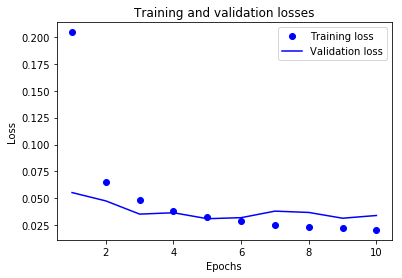

In [80]:
model1.compile(optimizer=optimizers.RMSprop(), loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])
MoHinhTrain1 = model1.fit(X_train, y_train_lbl, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(X_test, y_test_lbl))
DoThiTiLeLoi(MoHinhTrain1)

In [73]:
model1.compile(optimizer=optimizers.RMSprop(), loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])
MoHinhTrain1 = model1.fit(X_train, y_train_lbl, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(X_test, y_test_lbl))
DoThiTiLeLoi(MoHinhTrain1)

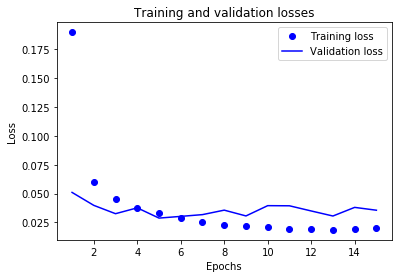

In [74]:
model2=model
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer=sgd, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhTrain2 = model2.fit(X_train, y_train_lbl, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(X_test, y_test_lbl))
DoThiTiLeLoi(MoHinhTrain2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 176us/step - loss: 8.3250e-04 - categorical_accuracy: 0.9946 - val_loss: 0.0014 - val_categorical_accuracy: 0.9909
Epoch 2/10
60000/60000 [==============================] - 10s 166us/step - loss: 7.5149e-04 - categorical_accuracy: 0.9951 - val_loss: 0.0014 - val_categorical_accuracy: 0.9909
Epoch 3/10
60000/60000 [==============================] - 10s 160us/step - loss: 7.6611e-04 - categorical_accuracy: 0.9952 - val_loss: 0.0014 - val_categorical_accuracy: 0.9909
Epoch 4/10
60000/60000 [==============================] - 10s 163us/step - loss: 7.9313e-04 - categorical_accuracy: 0.9949 - val_loss: 0.0013 - val_categorical_accuracy: 0.9909
Epoch 5/10
60000/60000 [==============================] - 10s 163us/step - loss: 7.9532e-04 - categorical_accuracy: 0.9948 - val_loss: 0.0013 - val_categorical_accuracy: 0.9909
Epoch 6/10
60000/60000 [==============================] - 12s 207

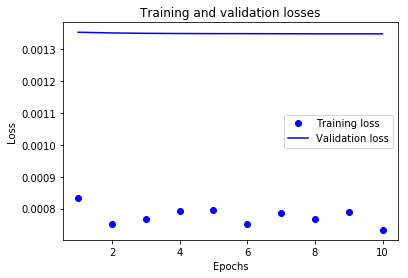

In [82]:
model3 = model
Adag = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.9)
model3.compile(optimizer=Adag, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhTrain3 = model3.fit(X_train, y_train_lbl, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(X_test, y_test_lbl))
DoThiTiLeLoi(MoHinhTrain3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 175us/step - loss: 7.4849e-04 - categorical_accuracy: 0.9950 - val_loss: 0.0013 - val_categorical_accuracy: 0.9909
Epoch 2/10
60000/60000 [==============================] - 10s 171us/step - loss: 7.5321e-04 - categorical_accuracy: 0.9951 - val_loss: 0.0013 - val_categorical_accuracy: 0.9909
Epoch 3/10
60000/60000 [==============================] - 11s 183us/step - loss: 7.6033e-04 - categorical_accuracy: 0.9951 - val_loss: 0.0013 - val_categorical_accuracy: 0.9909
Epoch 4/10
60000/60000 [==============================] - 13s 214us/step - loss: 7.5648e-04 - categorical_accuracy: 0.9952 - val_loss: 0.0013 - val_categorical_accuracy: 0.9909
Epoch 5/10
60000/60000 [==============================] - 12s 192us/step - loss: 7.5468e-04 - categorical_accuracy: 0.9953 - val_loss: 0.0013 - val_categorical_accuracy: 0.9909
Epoch 6/10
60000/60000 [==============================] - 11s 184

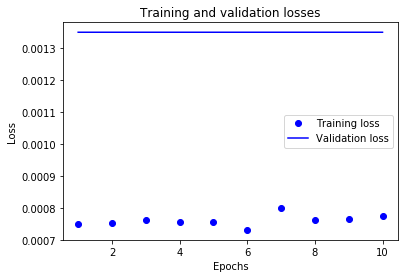

In [83]:
model4 = model
Adad = optimizers.Adadelta(lr=0.01, rho=0.95, epsilon=None, decay=0.9)
model4.compile(optimizer=Adad, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhTrain4 = model4.fit(X_train, y_train_lbl, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(X_test, y_test_lbl))
DoThiTiLeLoi(MoHinhTrain4)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 177us/step - loss: 8.9418e-04 - categorical_accuracy: 0.9942 - val_loss: 0.0014 - val_categorical_accuracy: 0.9913
Epoch 2/10
60000/60000 [==============================] - 11s 183us/step - loss: 7.0193e-04 - categorical_accuracy: 0.9955 - val_loss: 0.0014 - val_categorical_accuracy: 0.9915
Epoch 3/10
60000/60000 [==============================] - 10s 173us/step - loss: 6.4495e-04 - categorical_accuracy: 0.9958 - val_loss: 0.0014 - val_categorical_accuracy: 0.9917
Epoch 4/10
60000/60000 [==============================] - 10s 170us/step - loss: 6.9791e-04 - categorical_accuracy: 0.9953 - val_loss: 0.0013 - val_categorical_accuracy: 0.9916
Epoch 5/10
60000/60000 [==============================] - 11s 191us/step - loss: 6.1764e-04 - categorical_accuracy: 0.9961 - val_loss: 0.0013 - val_categorical_accuracy: 0.9915
Epoch 6/10
60000/60000 [==============================] - 11s 192

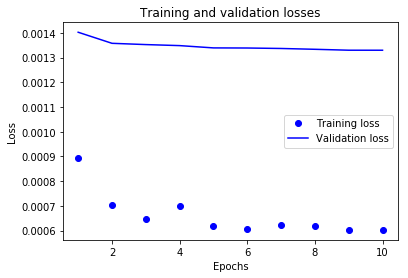

In [84]:
model5 = model
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)
model5.compile(optimizer=adam, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhTrain5 = model5.fit(X_train, y_train_lbl, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(X_test, y_test_lbl))
DoThiTiLeLoi(MoHinhTrain5)

In [87]:
#Chúng ta khởi tạo model bằng Sequential sau đó dùng method add để thêm các layer.
modelC = Sequential()
modelC.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
modelC.add(Conv2D(32, (3, 3), activation='relu'))
modelC.add(MaxPooling2D(pool_size=(2, 2)))
modelC.add(Dropout(droprate))
 
modelC.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelC.add(Conv2D(64, (3, 3), activation='relu'))
modelC.add(MaxPooling2D(pool_size=(2, 2)))
modelC.add(Dropout(droprate))
 
modelC.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelC.add(Conv2D(64, (3, 3), activation='relu'))
modelC.add(MaxPooling2D(pool_size=(2, 2)))
modelC.add(Dropout(droprate))
 
modelC.add(Flatten())
modelC.add(Dense(128, activation='relu'))
modelC.add(Dropout(droprate))
modelC.add(Dense(10, activation='softmax'))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.4022 - categorical_accuracy: 0.8713 - val_loss: 0.0475 - val_categorical_accuracy: 0.9857
Epoch 2/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.0896 - categorical_accuracy: 0.9744 - val_loss: 0.0366 - val_categorical_accuracy: 0.9897
Epoch 3/10
60000/60000 [==============================] - 14s 231us/step - loss: 0.0664 - categorical_accuracy: 0.9814 - val_loss: 0.0347 - val_categorical_accuracy: 0.9903
Epoch 4/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.0509 - categorical_accuracy: 0.9858 - val_loss: 0.0249 - val_categorical_accuracy: 0.9929
Epoch 5/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.0448 - categorical_accuracy: 0.9878 - val_loss: 0.0223 - val_categorical_accuracy: 0.9934
Epoch 6/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.03

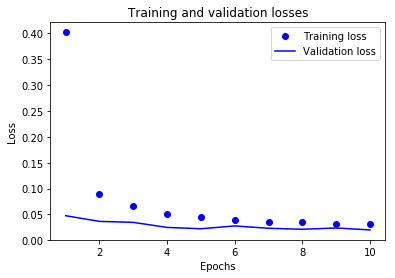

In [88]:
modelC1=modelC
modelC1.compile(optimizer=optimizers.RMSprop(), loss=losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])
MoHinhTrainC1 = modelC1.fit(X_train, y_train_lbl, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(X_test, y_test_lbl))
DoThiTiLeLoi(MoHinhTrainC1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 181us/step - loss: 9.0743e-04 - categorical_accuracy: 0.9946 - val_loss: 8.3875e-04 - val_categorical_accuracy: 0.9949
Epoch 2/10
60000/60000 [==============================] - 10s 169us/step - loss: 8.2467e-04 - categorical_accuracy: 0.9950 - val_loss: 8.1386e-04 - val_categorical_accuracy: 0.9951
Epoch 3/10
60000/60000 [==============================] - 10s 171us/step - loss: 7.8498e-04 - categorical_accuracy: 0.9951 - val_loss: 7.9911e-04 - val_categorical_accuracy: 0.9952
Epoch 4/10
60000/60000 [==============================] - 10s 171us/step - loss: 8.2723e-04 - categorical_accuracy: 0.9948 - val_loss: 7.9061e-04 - val_categorical_accuracy: 0.9951
Epoch 5/10
60000/60000 [==============================] - 10s 170us/step - loss: 7.5233e-04 - categorical_accuracy: 0.9952 - val_loss: 7.8128e-04 - val_categorical_accuracy: 0.9950
Epoch 6/10
60000/60000 [=====================

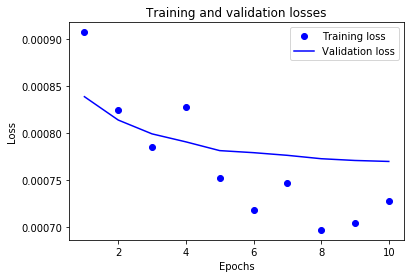

In [89]:
modelC2=modelC
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
modelC2.compile(optimizer=sgd, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhTrainC2 = modelC2.fit(X_train, y_train_lbl, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(X_test, y_test_lbl))
DoThiTiLeLoi(MoHinhTrainC2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0011 - categorical_accuracy: 0.9933 - val_loss: 9.2921e-04 - val_categorical_accuracy: 0.9947
Epoch 2/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0011 - categorical_accuracy: 0.9936 - val_loss: 9.1782e-04 - val_categorical_accuracy: 0.9948
Epoch 3/10
60000/60000 [==============================] - 10s 174us/step - loss: 9.9540e-04 - categorical_accuracy: 0.9939 - val_loss: 9.1352e-04 - val_categorical_accuracy: 0.9948
Epoch 4/10
60000/60000 [==============================] - 10s 173us/step - loss: 9.9638e-04 - categorical_accuracy: 0.9940 - val_loss: 9.1166e-04 - val_categorical_accuracy: 0.9948
Epoch 5/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0010 - categorical_accuracy: 0.9938 - val_loss: 9.1012e-04 - val_categorical_accuracy: 0.9948
Epoch 6/10
60000/60000 [==============================] -

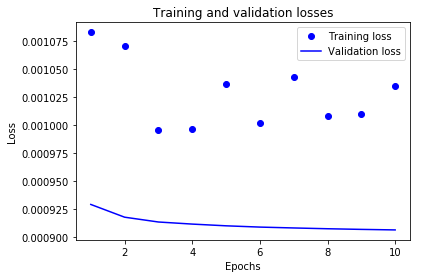

In [90]:
modelC3 = modelC
Adag = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.9)
modelC3.compile(optimizer=Adag, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhTrainC3 = modelC3.fit(X_train, y_train_lbl, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(X_test, y_test_lbl))
DoThiTiLeLoi(MoHinhTrainC3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0010 - categorical_accuracy: 0.9935 - val_loss: 9.0589e-04 - val_categorical_accuracy: 0.9948
Epoch 2/10
60000/60000 [==============================] - 11s 178us/step - loss: 9.7801e-04 - categorical_accuracy: 0.9940 - val_loss: 9.0585e-04 - val_categorical_accuracy: 0.9948
Epoch 3/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0010 - categorical_accuracy: 0.9936 - val_loss: 9.0582e-04 - val_categorical_accuracy: 0.9948
Epoch 4/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0010 - categorical_accuracy: 0.9937 - val_loss: 9.0581e-04 - val_categorical_accuracy: 0.9948
Epoch 5/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0011 - categorical_accuracy: 0.9933 - val_loss: 9.0580e-04 - val_categorical_accuracy: 0.9948
Epoch 6/10
60000/60000 [==============================] - 11s

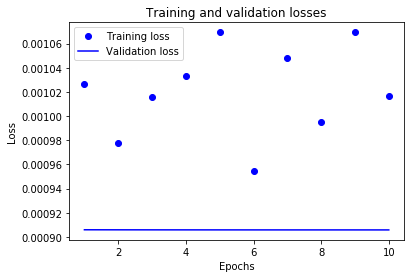

In [91]:
modelC4 = modelC
Adad = optimizers.Adadelta(lr=0.01, rho=0.95, epsilon=None, decay=0.9)
modelC4.compile(optimizer=Adad, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhTrainC4 = modelC4.fit(X_train, y_train_lbl, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(X_test, y_test_lbl))
DoThiTiLeLoi(MoHinhTrainC4)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0011 - categorical_accuracy: 0.9932 - val_loss: 8.3637e-04 - val_categorical_accuracy: 0.9952
Epoch 2/10
60000/60000 [==============================] - 14s 233us/step - loss: 9.2997e-04 - categorical_accuracy: 0.9942 - val_loss: 7.9876e-04 - val_categorical_accuracy: 0.9952
Epoch 3/10
60000/60000 [==============================] - 13s 213us/step - loss: 8.2606e-04 - categorical_accuracy: 0.9949 - val_loss: 7.9527e-04 - val_categorical_accuracy: 0.9954
Epoch 4/10
60000/60000 [==============================] - 12s 207us/step - loss: 7.1890e-04 - categorical_accuracy: 0.9956 - val_loss: 7.8966e-04 - val_categorical_accuracy: 0.9954
Epoch 5/10
60000/60000 [==============================] - 12s 204us/step - loss: 7.8963e-04 - categorical_accuracy: 0.9951 - val_loss: 7.8992e-04 - val_categorical_accuracy: 0.9953
Epoch 6/10
60000/60000 [=========================

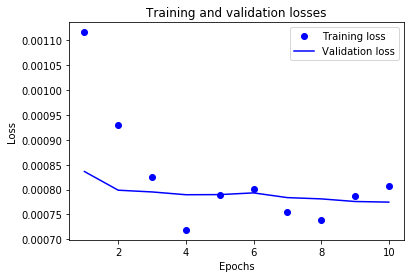

In [92]:
modelC5 = modelC
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.9, amsgrad=False)
modelC5.compile(optimizer=adam, loss=losses.mean_squared_error,metrics=[metrics.categorical_accuracy])
MoHinhTrainC5 = modelC5.fit(X_train, y_train_lbl, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(X_test, y_test_lbl))
DoThiTiLeLoi(MoHinhTrainC5)

In [175]:
modelC5.save('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/1_mnist/modelC5.h5')

In [ ]:
#modelC52=load_model('F:/8_Machine Learning/Bai tap Deeplearning/2_CNN/1_mnist/modelC5.h5')

# Dự đoán

In [158]:
X = X_train[0].reshape(1, 1, image_size, image_size)

In [159]:
rs=model1.predict(X)

In [164]:
rs[0]

array([3.3502485e-19, 9.6345561e-16, 1.5872091e-16, 3.7496962e-04,
       3.2686242e-18, 9.9962497e-01, 6.5182091e-12, 1.7133785e-13,
       1.3304402e-11, 4.3510902e-09], dtype=float32)

In [161]:
max_indexImage = np.argmax(rs[0])

In [162]:
max_indexImage

5

In [120]:
def DuDoanFullDataRecall(MoHinh,Anh,Nhan):
    Dem=0
    lblData=[]
    lblPre=[]
    for stt in range(Anh.shape[0]):
        X = Anh[stt].reshape(1, 1, image_size, image_size)
        rs=MoHinh.predict(X)
        KQPre = np.argmax(rs[0])
        Nhanlbl = Nhan[stt]
        lblData.append(Nhanlbl)
        lblPre.append(KQPre)
    return lblData,lblPre

In [121]:
lblDuLieu,lblPredict=DuDoanFullDataRecall(model1,X_train,y_train)

In [123]:
from sklearn.metrics import classification_report

In [124]:
print(classification_report(lblDuLieu,lblPredict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5923
          1       1.00      1.00      1.00      6742
          2       1.00      1.00      1.00      5958
          3       1.00      1.00      1.00      6131
          4       1.00      1.00      1.00      5842
          5       1.00      1.00      1.00      5421
          6       1.00      1.00      1.00      5918
          7       1.00      1.00      1.00      6265
          8       1.00      1.00      1.00      5851
          9       1.00      1.00      1.00      5949

avg / total       1.00      1.00      1.00     60000



In [125]:
lblDuLieuTest,lblPredictTest=DuDoanFullDataRecall(model1,X_test,y_test)

In [126]:
print(classification_report(lblDuLieuTest,lblPredictTest))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       980
          1       1.00      1.00      1.00      1135
          2       0.99      0.99      0.99      1032
          3       0.99      1.00      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.99      0.99      1028
          8       0.99      0.99      0.99       974
          9       0.99      0.98      0.99      1009

avg / total       0.99      0.99      0.99     10000



In [127]:
lblDuLieuTestC5,lblPredictTestC5=DuDoanFullDataRecall(modelC5,X_test,y_test)
print(classification_report(lblDuLieuTestC5,lblPredictTestC5))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       980
          1       0.99      1.00      1.00      1135
          2       1.00      1.00      1.00      1032
          3       0.99      1.00      1.00      1010
          4       0.99      1.00      0.99       982
          5       1.00      0.99      0.99       892
          6       1.00      0.99      1.00       958
          7       0.99      1.00      0.99      1028
          8       1.00      1.00      1.00       974
          9       1.00      0.99      0.99      1009

avg / total       1.00      1.00      1.00     10000



In [171]:
def HienThiAnhDuDoanSai(MoHinh,ImageTr,TapDuLieu,Lbl,NumImage,Hang,Cot, figsize=(20,10)):
    figs = plt.figure(figsize=figsize)
    i=1
    for NumI in range(TapDuLieu.shape[0]):
        rs=MoHinh.predict(TapDuLieu[NumI].reshape(1, 1, image_size, image_size))
        KQPre = np.argmax(rs[0])
        TiLe = rs[0][int(KQPre)]*100
        NhanT = Lbl[NumI]
        if str(KQPre)!= str(NhanT):
            img = ImageTr[NumI]
            plt.subplot(Hang, Cot, i)
            #print(i)
            plt.axis('off')
            plt.title(str(str(NhanT)+" : "+str(KQPre)+"-"+str(round(TiLe,1))+"%"), fontsize=8)
            i += 1
            _ = plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.show()

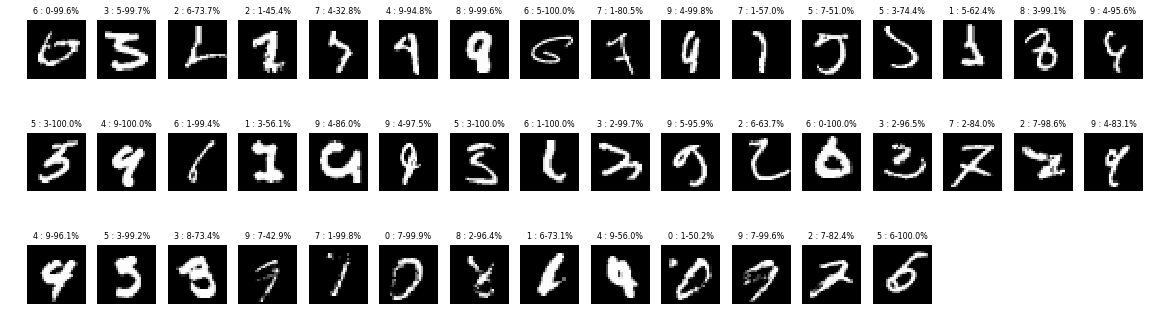

In [177]:
HienThiAnhDuDoanSai(modelC5,DataImageTest,X_test,y_test,320,5,16)